In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
delay_url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
weather_url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
w_t = pd.read_csv(weather_url, sep=',').dropna()
delay_table = pd.read_csv(delay_url, sep=',')
delay_table = delay_table.dropna()

In [ ]:
df0 = delay_table.where(delay_table['dep_delay'] > 0)

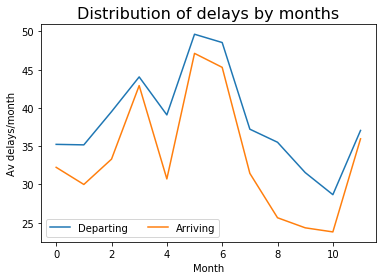

In [ ]:
plt.plot(np.arange(12), df0.groupby('month')['dep_delay'].mean(), label = 'Departing')
plt.plot(np.arange(12), df0.groupby('month')['arr_delay'].mean(), label = 'Arriving')
plt.xlabel('Month')
plt.ylabel('Av delays/month')
plt.title("Distribution of delays by months", fontsize=16)
plt.legend(ncol = 2)
plt.show()

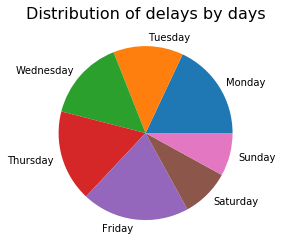

In [ ]:
top_100_days = df0.dropna().groupby(['month', 'day'])['dep_delay'].mean().sort_values()[::-1].head(100)
dates_top_100 = np.array(top_100_days.axes).astype(int)[0].T
days_before_month = np.cumsum([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
week_days_top_100 = (days_before_month[dates_top_100[0] - 1] + dates_top_100[1] + 5) % 7
plt.pie(np.bincount(week_days_top_100), labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Distribution of delays by days", fontsize=16)
plt.show()

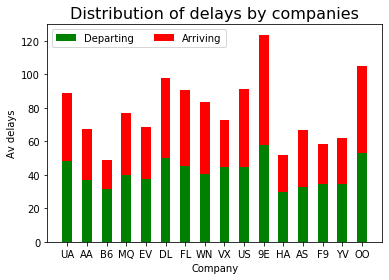

In [ ]:
company = df0.dropna()['carrier'].unique()
plt.bar(np.arange(len(company)), df0.dropna().groupby('carrier')['dep_delay'].mean(), color = 'green', width = 0.5, label = 'Departing')
plt.bar(np.arange(len(company)), df0.dropna().groupby('carrier')['arr_delay'].mean(), bottom = df0.dropna().groupby('carrier')['dep_delay'].mean(), color = 'red', width = 0.5, label = 'Arriving')
plt.xticks(np.arange(len(company)), company)
plt.xlabel('Company')
plt.ylabel('Av delays')
plt.title("Distribution of delays by companies", fontsize=16)
plt.legend(ncol = 2)
plt.show()

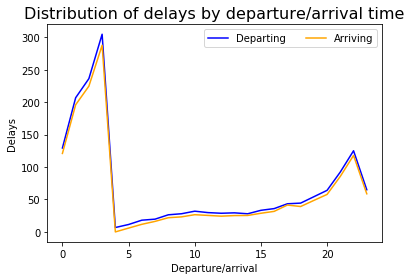

In [ ]:
plt.plot(np.arange(24), np.array(df0.groupby('hour')['dep_delay'].mean()), color = 'blue', label = 'Departing')
plt.plot(np.arange(24), np.array(df0.groupby('hour')['arr_delay'].mean()), color = 'orange', label = 'Arriving')
plt.xlabel('Departure/arrival')
plt.ylabel('Delays')
plt.title("Distribution of delays by departure/arrival time", fontsize=16)
plt.legend(ncol = 2)
plt.show()

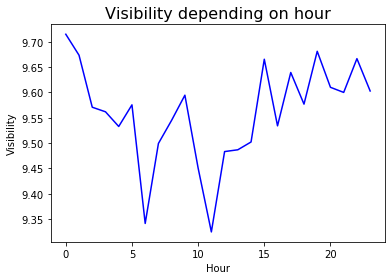

-0.30403874532408987

In [ ]:
plt.plot(w_t.groupby(['hour'])['visib'].mean(), color = 'blue')
plt.xlabel('Hour')
plt.ylabel('Visibility')
plt.title("Visibility depending on hour", fontsize=16)
plt.show()

np.corrcoef(w_t.groupby(['month', 'day'])['visib'].mean() - w_t['visib'].mean(), df0.dropna().groupby(['month', 'day'])['dep_delay'].sum()[:-1])[0,1]

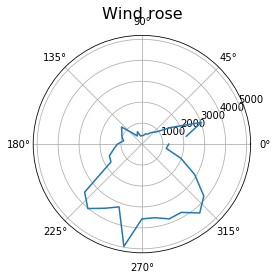

In [ ]:
angles = np.sort(w_t['wind_dir'].unique())
values = w_t.groupby('wind_dir')['wind_speed'].sum()
plt.polar(np.sort(w_t['wind_dir'].unique())[1:] * np.pi / 180, w_t.groupby('wind_dir')['wind_speed'].sum()[1:])
plt.title("Wind rose", fontsize=16)
plt.show()

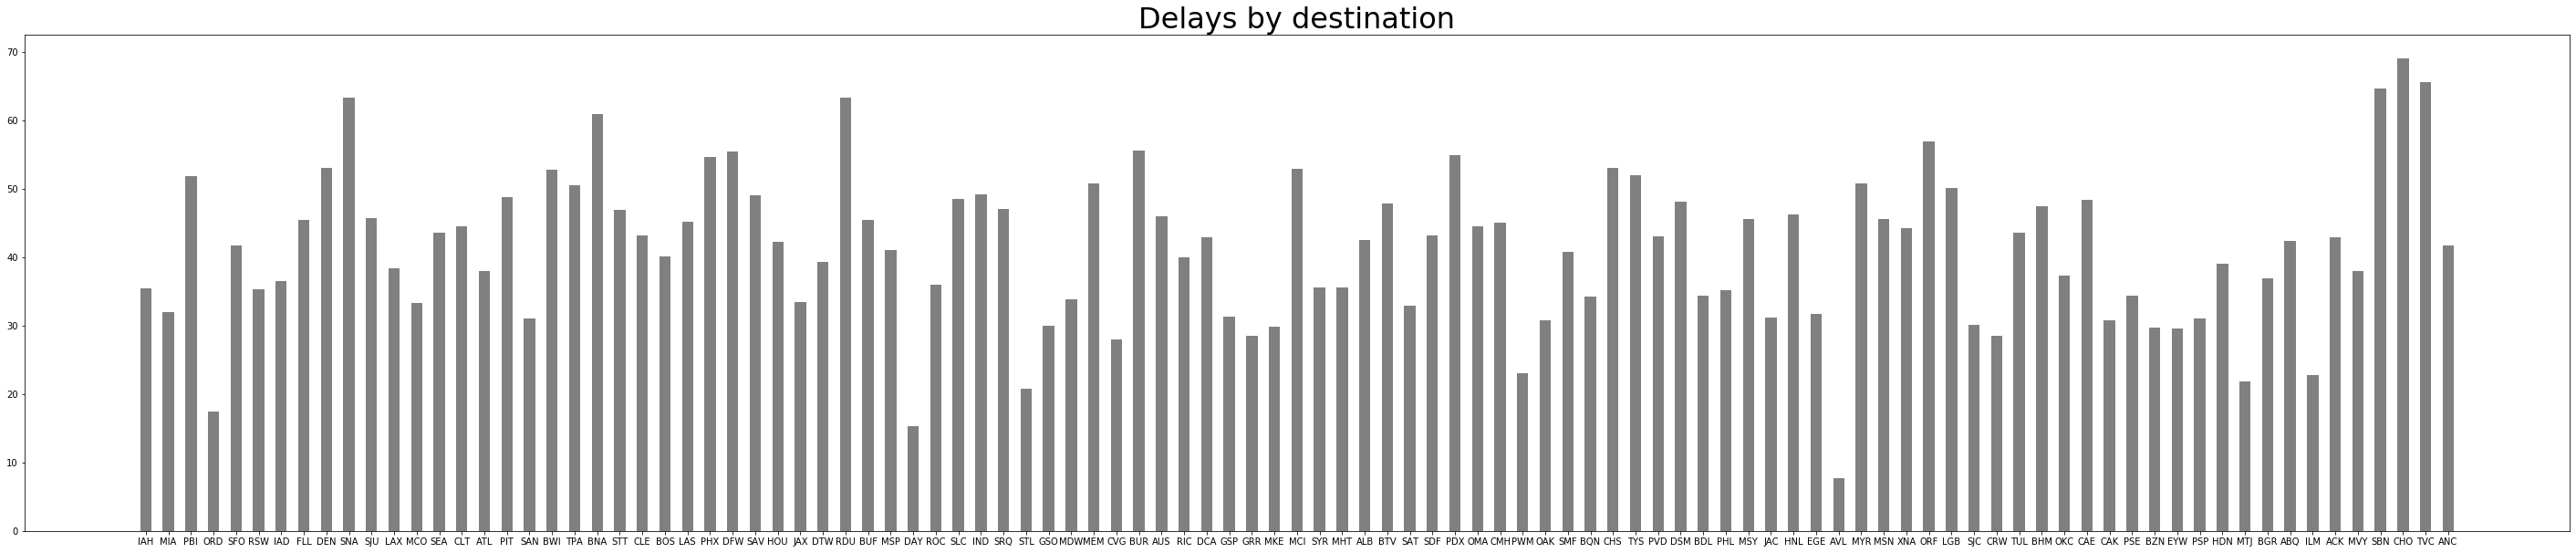

In [ ]:
dest = df0.dropna()['dest'].unique()
plt.figure(figsize=(50,10))
plt.bar(np.arange(len(dest)), df0.dropna().groupby('dest')['dep_delay'].mean(), color = 'grey', width = 0.5)
plt.xticks(np.arange(len(dest)), dest)
plt.title("Delays by destination", fontsize=32)
plt.show()

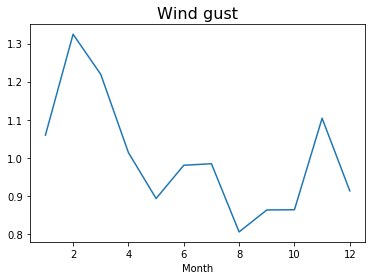

-0.06931827607404459

In [ ]:
plt.plot(w_t.groupby(['month'])['wind_gust'].mean() / w_t['wind_gust'].mean())
plt.xlabel('Month')
plt.title("Wind gust", fontsize=16)
plt.show()

np.corrcoef(w_t.groupby(['month', 'day'])['wind_gust'].mean() - w_t['wind_gust'].mean(), df0.dropna().groupby(['month', 'day'])['dep_delay'].sum()[:-1])[0,1]

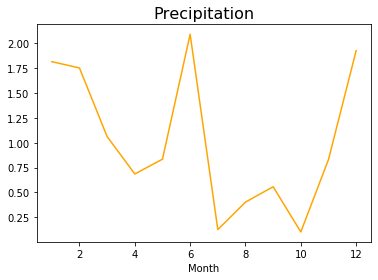

0.2128358017548486

In [ ]:
plt.plot(w_t.groupby(['month'])['precip'].mean() / w_t['precip'].mean(), color = 'orange')
plt.xlabel('Month')
plt.title("Precipitation", fontsize=16)
plt.show()

np.corrcoef(w_t.groupby(['month', 'day'])['precip'].mean() - w_t['precip'].mean(), df0.dropna().groupby(['month', 'day'])['dep_delay'].sum()[:-1])[0,1]

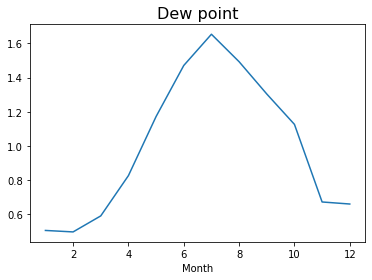

0.3411118637242932

In [ ]:
plt.plot(w_t.groupby(['month'])['dewp'].mean() / w_t['dewp'].mean())
plt.xlabel('Month')
plt.title("Dew point", fontsize=16)
plt.show()

np.corrcoef(w_t.groupby(['month', 'day'])['dewp'].mean() - w_t['dewp'].mean(), df0.dropna().groupby(['month', 'day'])['dep_delay'].sum()[:-1])[0,1]